In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams
rcParams["font.size"] = 14

import numpy as np
import pandas as pd
import radvel
from radvel.plot import orbit_plots
from rv_obs_sim.simGrid import SimGrid

%load_ext autoreload
%autoreload 2

In [2]:
sys_name = 'hip8152'
config_id = 'base'
real = True

if real:
    data_file = f'{sys_name}/{sys_name}_rv.csv'
else:
    data_file = None

if real:
    moc_grid = np.arange(0, 31)
else:
    moc_grid = np.arange(1, 31)
nrv_grid = np.arange(10, 101)

base_config_file = f'{sys_name}/{sys_name}_base_config.py'
fit_config_file = f'{sys_name}/{sys_name}_{config_id}_config.py'

sim_grid = SimGrid(moc_grid, nrv_grid, base_config_file, fit_config_file,
                         sys_name=sys_name,
                         config_id=config_id,
                         data_file=data_file,
                         read_csv_kwargs={'comment':'#'},
                         random_seed=266)

In [3]:
ksim_grid = sim_grid.get_ksim_grid(save_posts=True)

100%|██████████| 31/31 [02:31<00:00,  4.89s/it]


In [4]:
ksim_over_ktruth = sim_grid.get_ksim_over_ktruth()
ksim_minus_ktruth_over_kerr = sim_grid.get_ksim_minus_ktruth_over_kerr()

In [9]:
import os
output_dir = os.path.join(sys_name, config_id)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [10]:
# K sim over k truth grid
data_fname = os.path.join(output_dir, f'{sys_name}_real_grid_{config_id}_config_ksim_over_ktruth.npy')
np.save(data_fname, sim_grid.ksim_over_ktruth)

# K sim minus k truth over K truth error grid
data_fname = os.path.join(output_dir, f'{sys_name}_real_grid_{config_id}_config_diff_over_sigma.npy')
np.save(data_fname, sim_grid.ksim_minus_ktruth_over_kerr)

fname = os.path.join(output_dir, f'{sys_name}_real_grid_{config_id}_post_objects.npy')
np.save(fname, sim_grid.post_grid, allow_pickle=True)

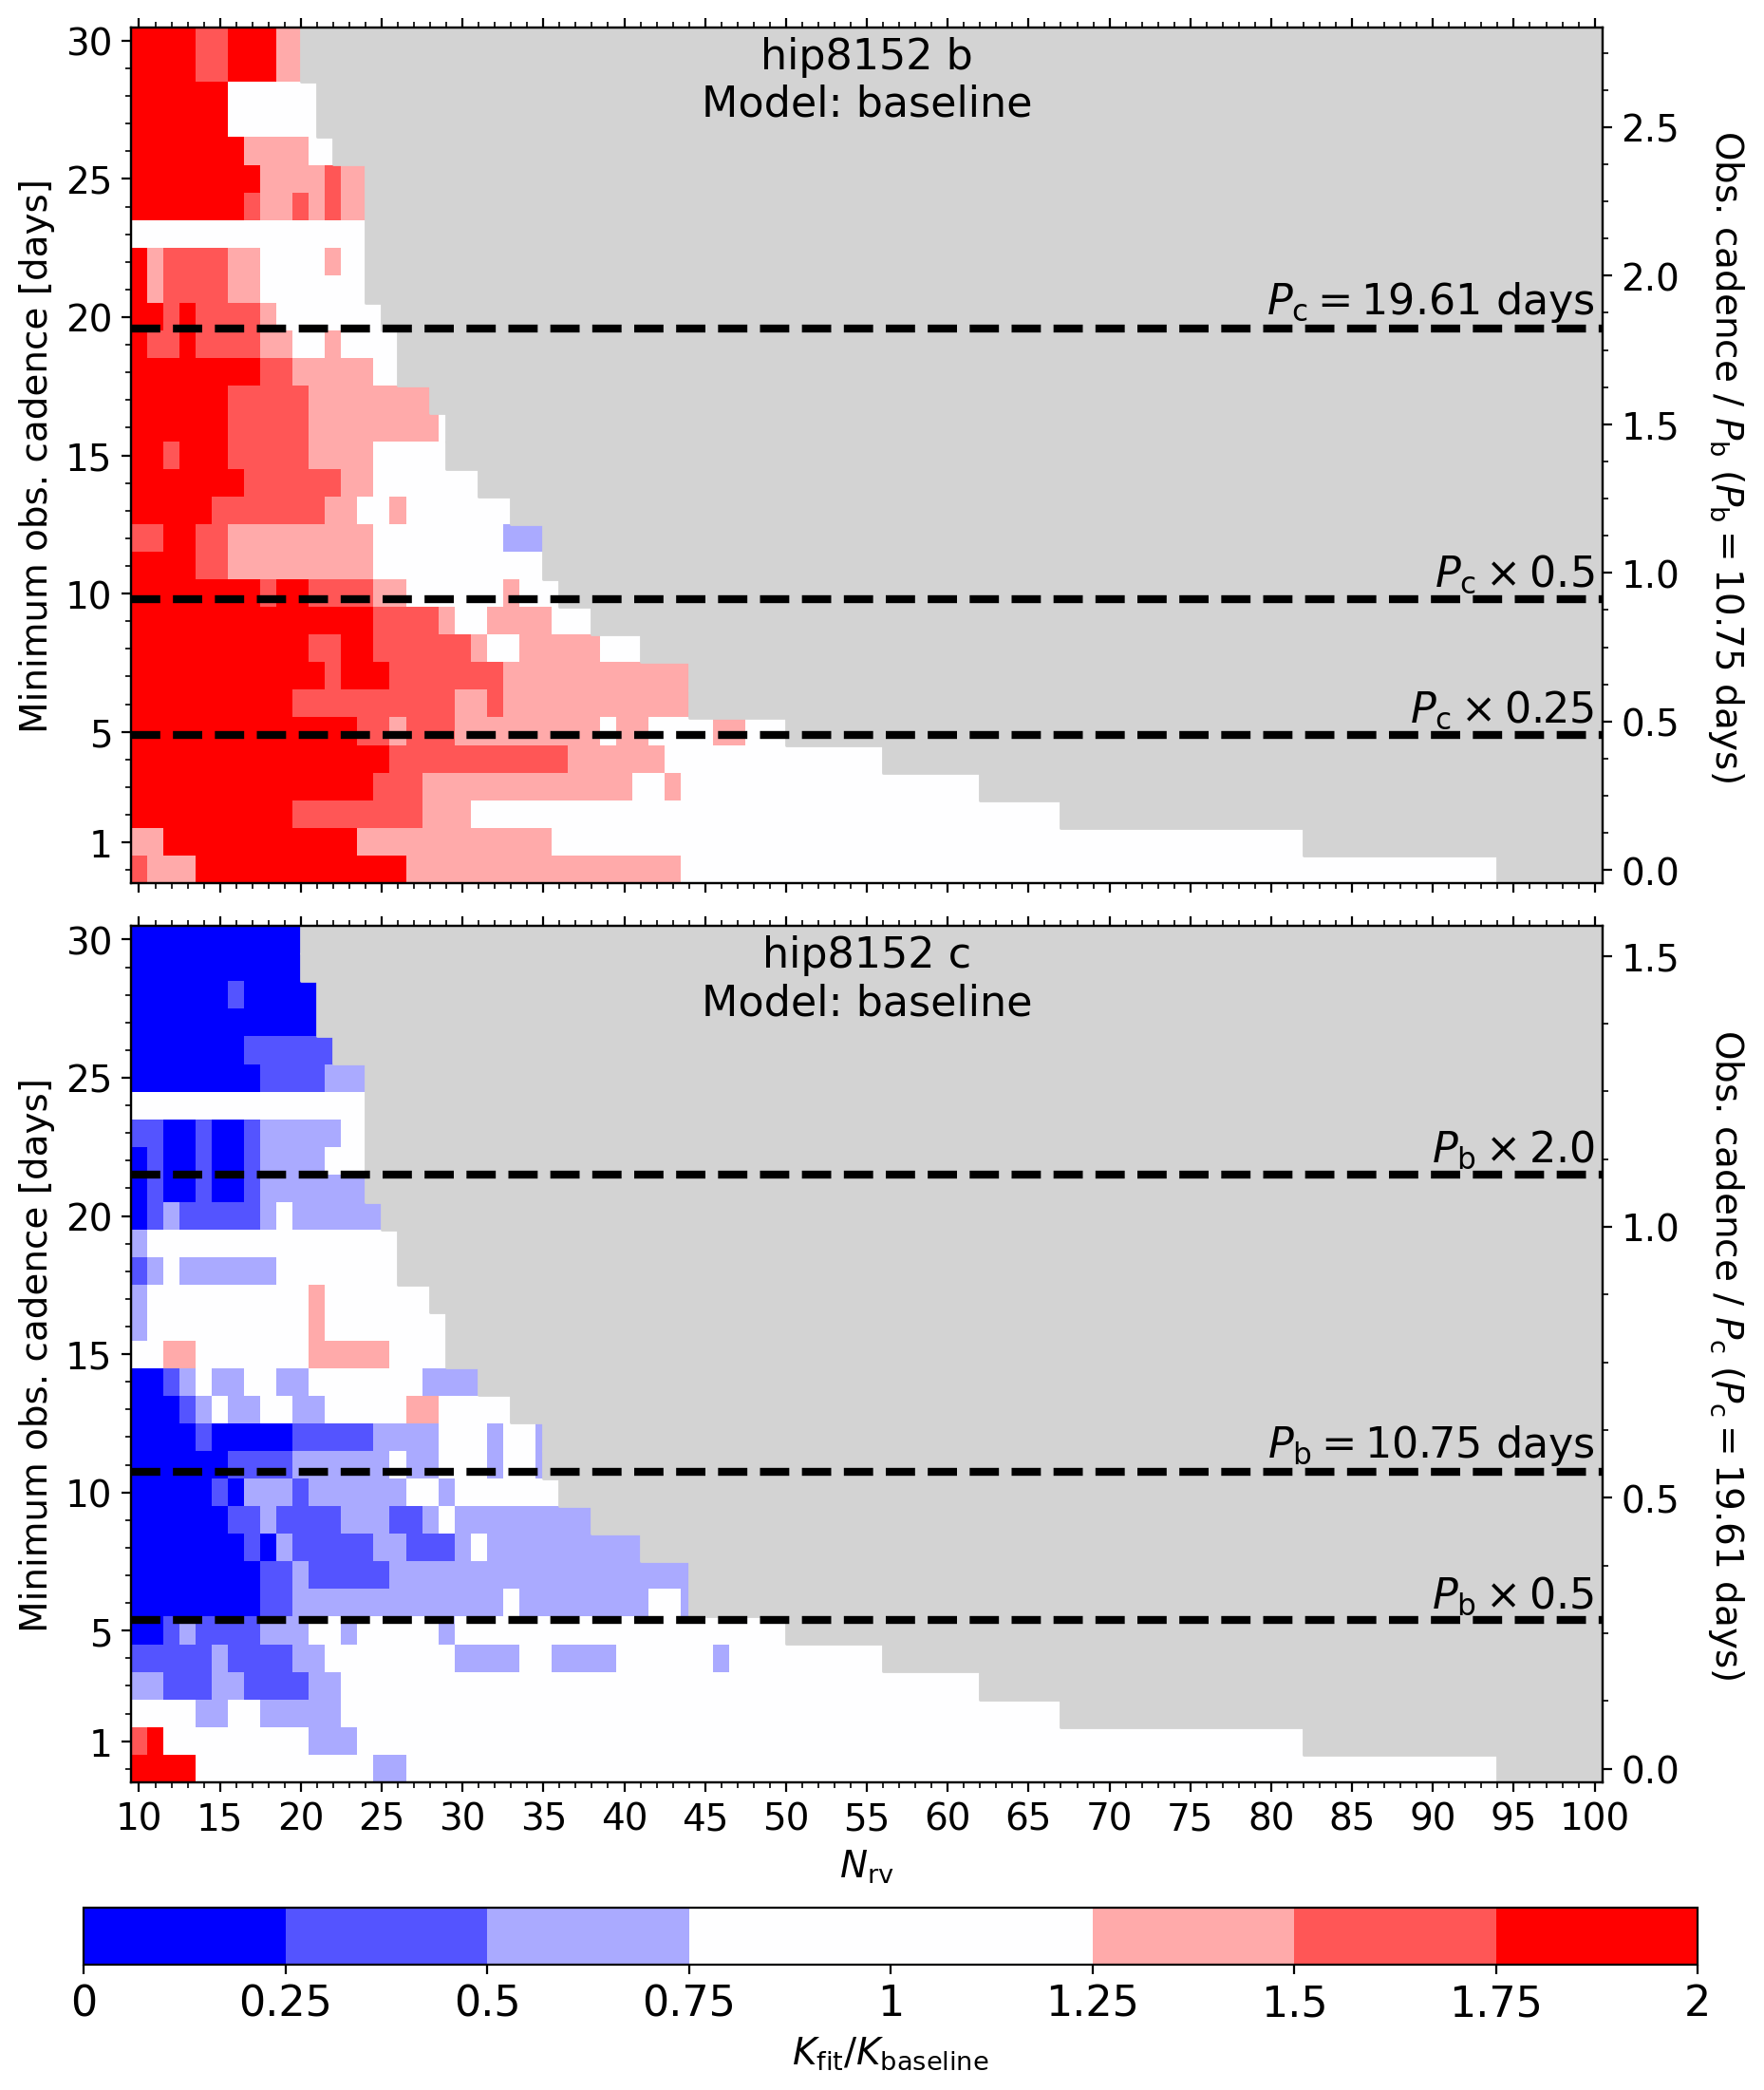

In [7]:
fig_arr, axes_arr = sim_grid.make_grid_plot(ksim_over_ktruth, cbar_units='ratio')

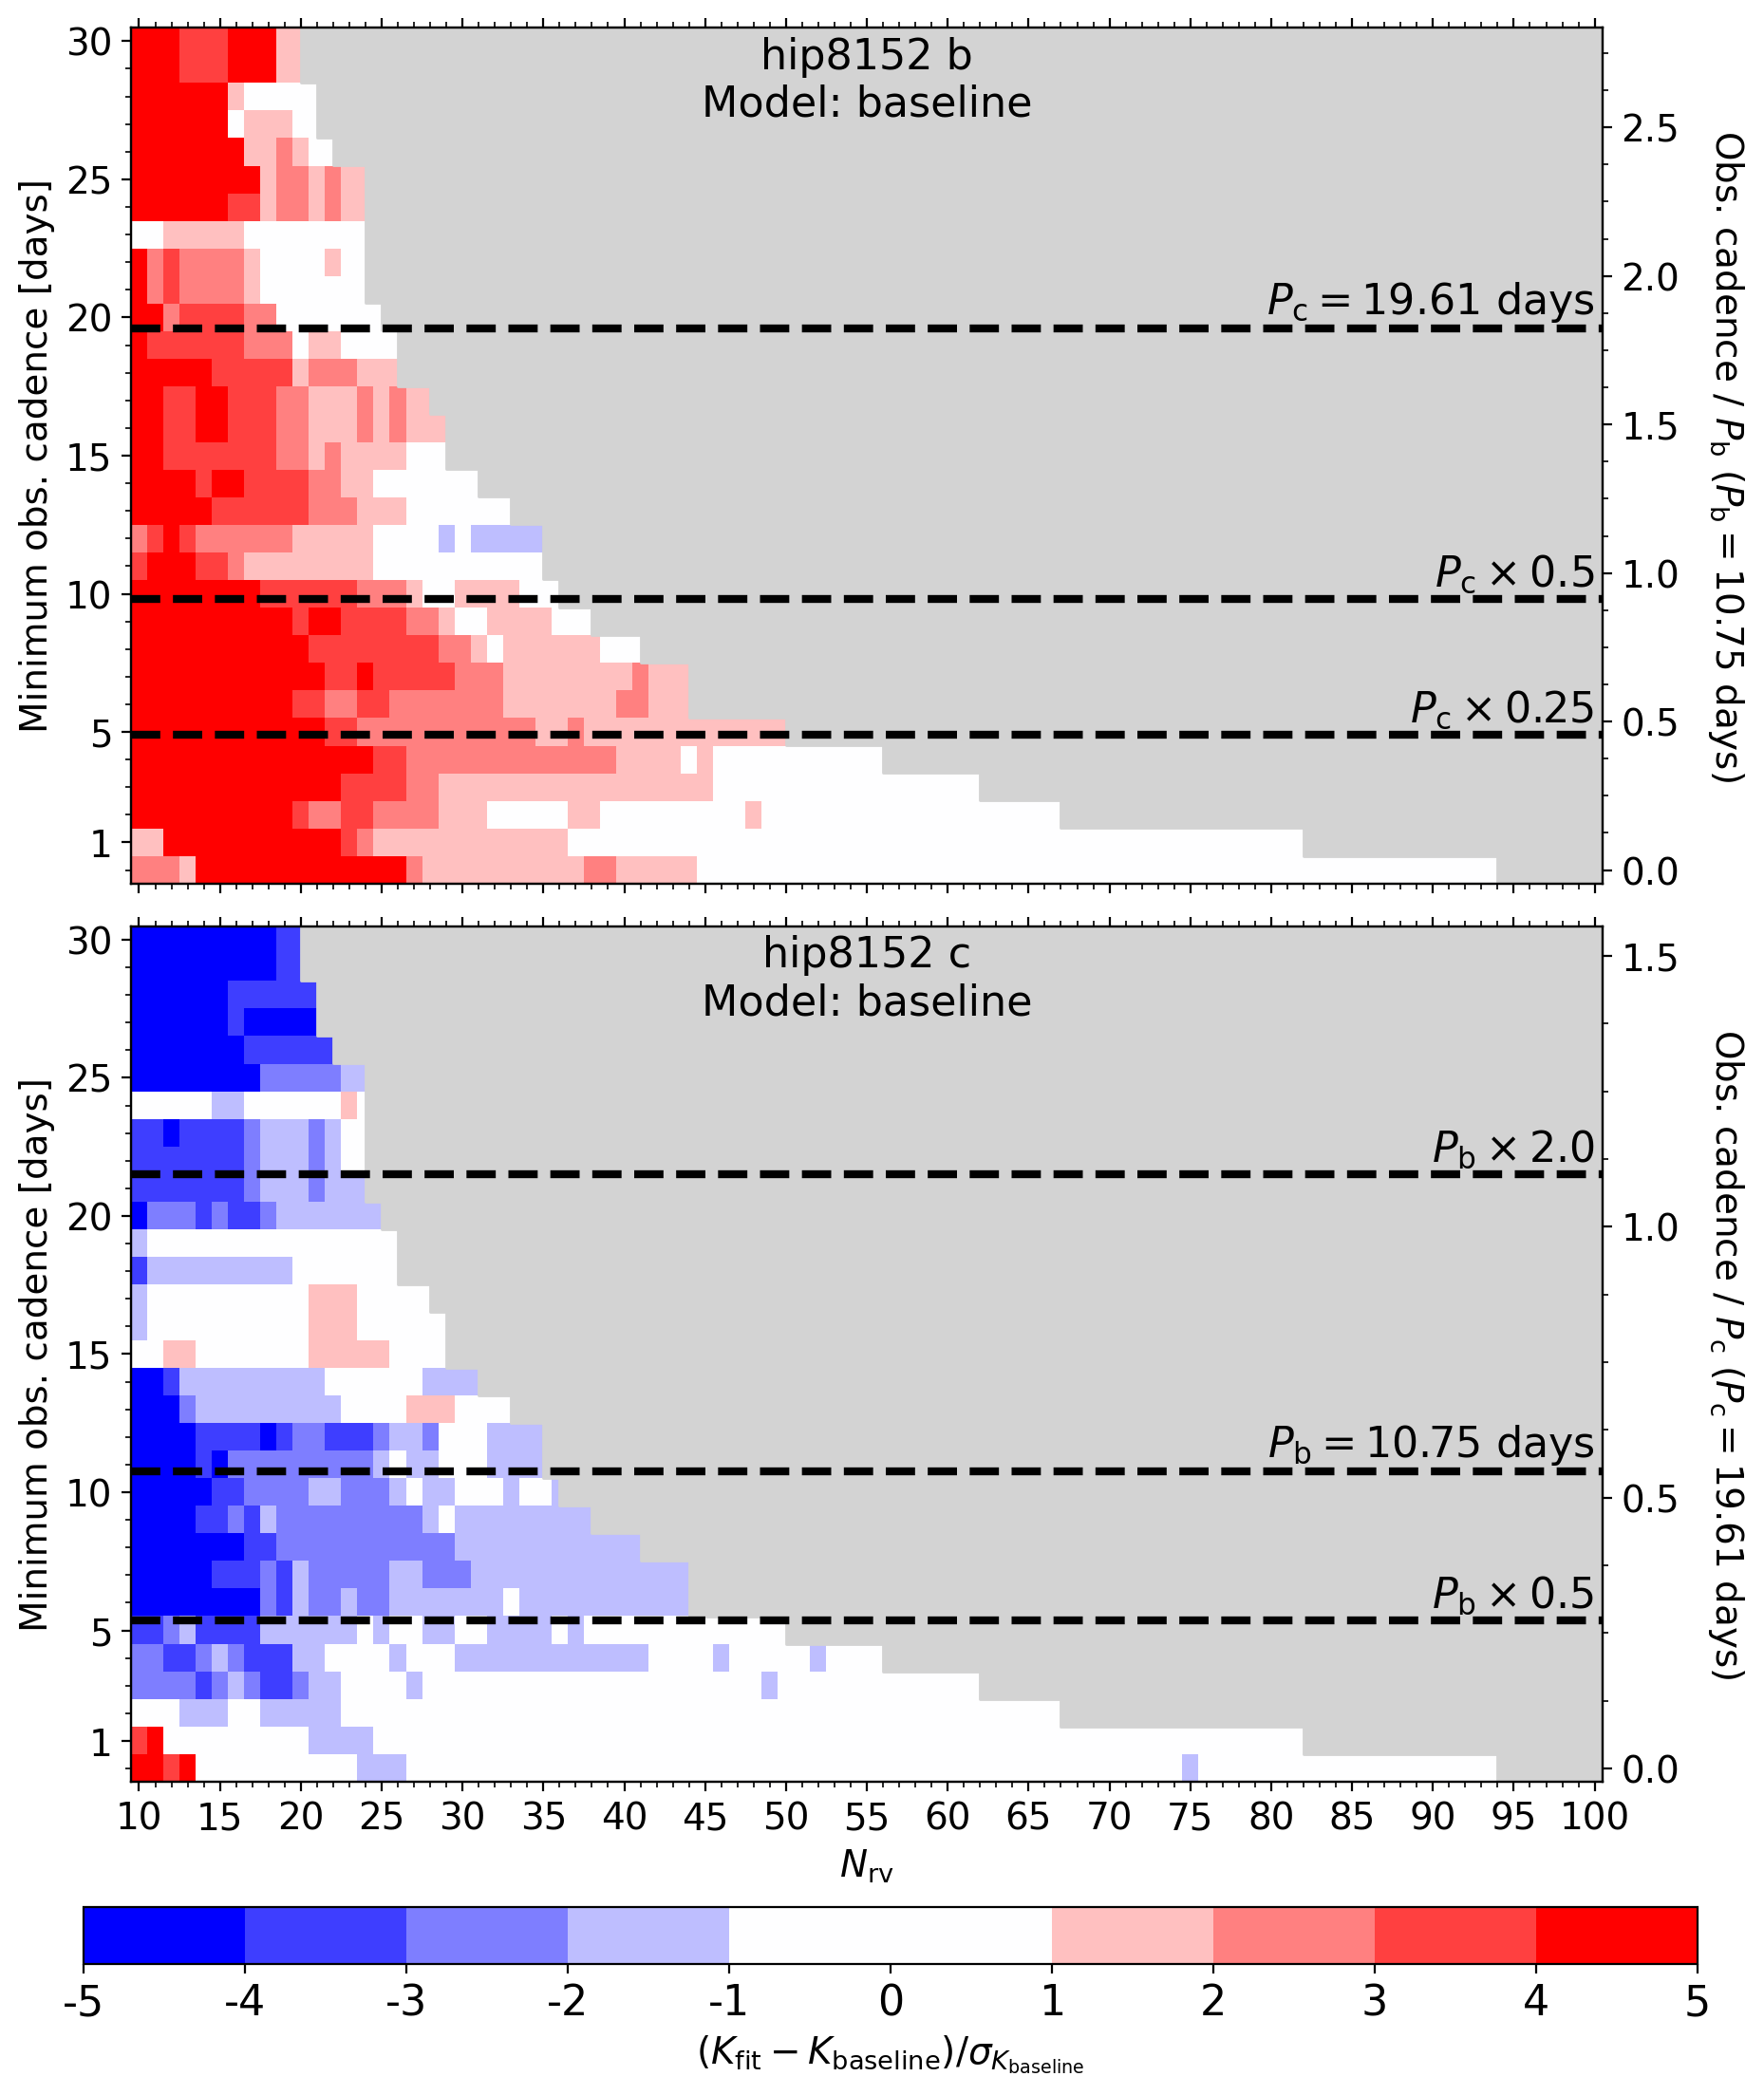

In [8]:
fig_arr, axes_arr = sim_grid.make_grid_plot(ksim_minus_ktruth_over_kerr, cbar_units='diff_over_sigma')

## Plot the RV time series for a single grid cell
Do this to inspect combinations of MOC and $N_{RV}$. When generating your grid, must have `sim_grid.get_ksim_grid(save_posts=True)`

In [18]:
moc = 0
nrv = 40
moc_ind = sim_grid.convert_moc_to_grid_ind(moc)
nrv_ind = sim_grid.convert_nrv_to_grid_ind(nrv)
sim_grid.post_grid[moc_ind, nrv_ind]

parameter                     value      vary
per1                         10.751       True
tc1                        -723.427       True
secosw1                           0      False
sesinw1                           0      False
k1                          3.39543       True
per2                        19.6055       True
tc2                         -718.22       True
secosw2                           0      False
sesinw2                           0      False
k2                          2.52046       True
dvdt                              0      False
curv                              0      False
gamma                      -1.60871       True
jit                         3.25284       True
tp1                        -726.115           
e1                                0           
w1                                0           
tp2                        -723.122           
e2                                0           
w2                                0           

Priors
------

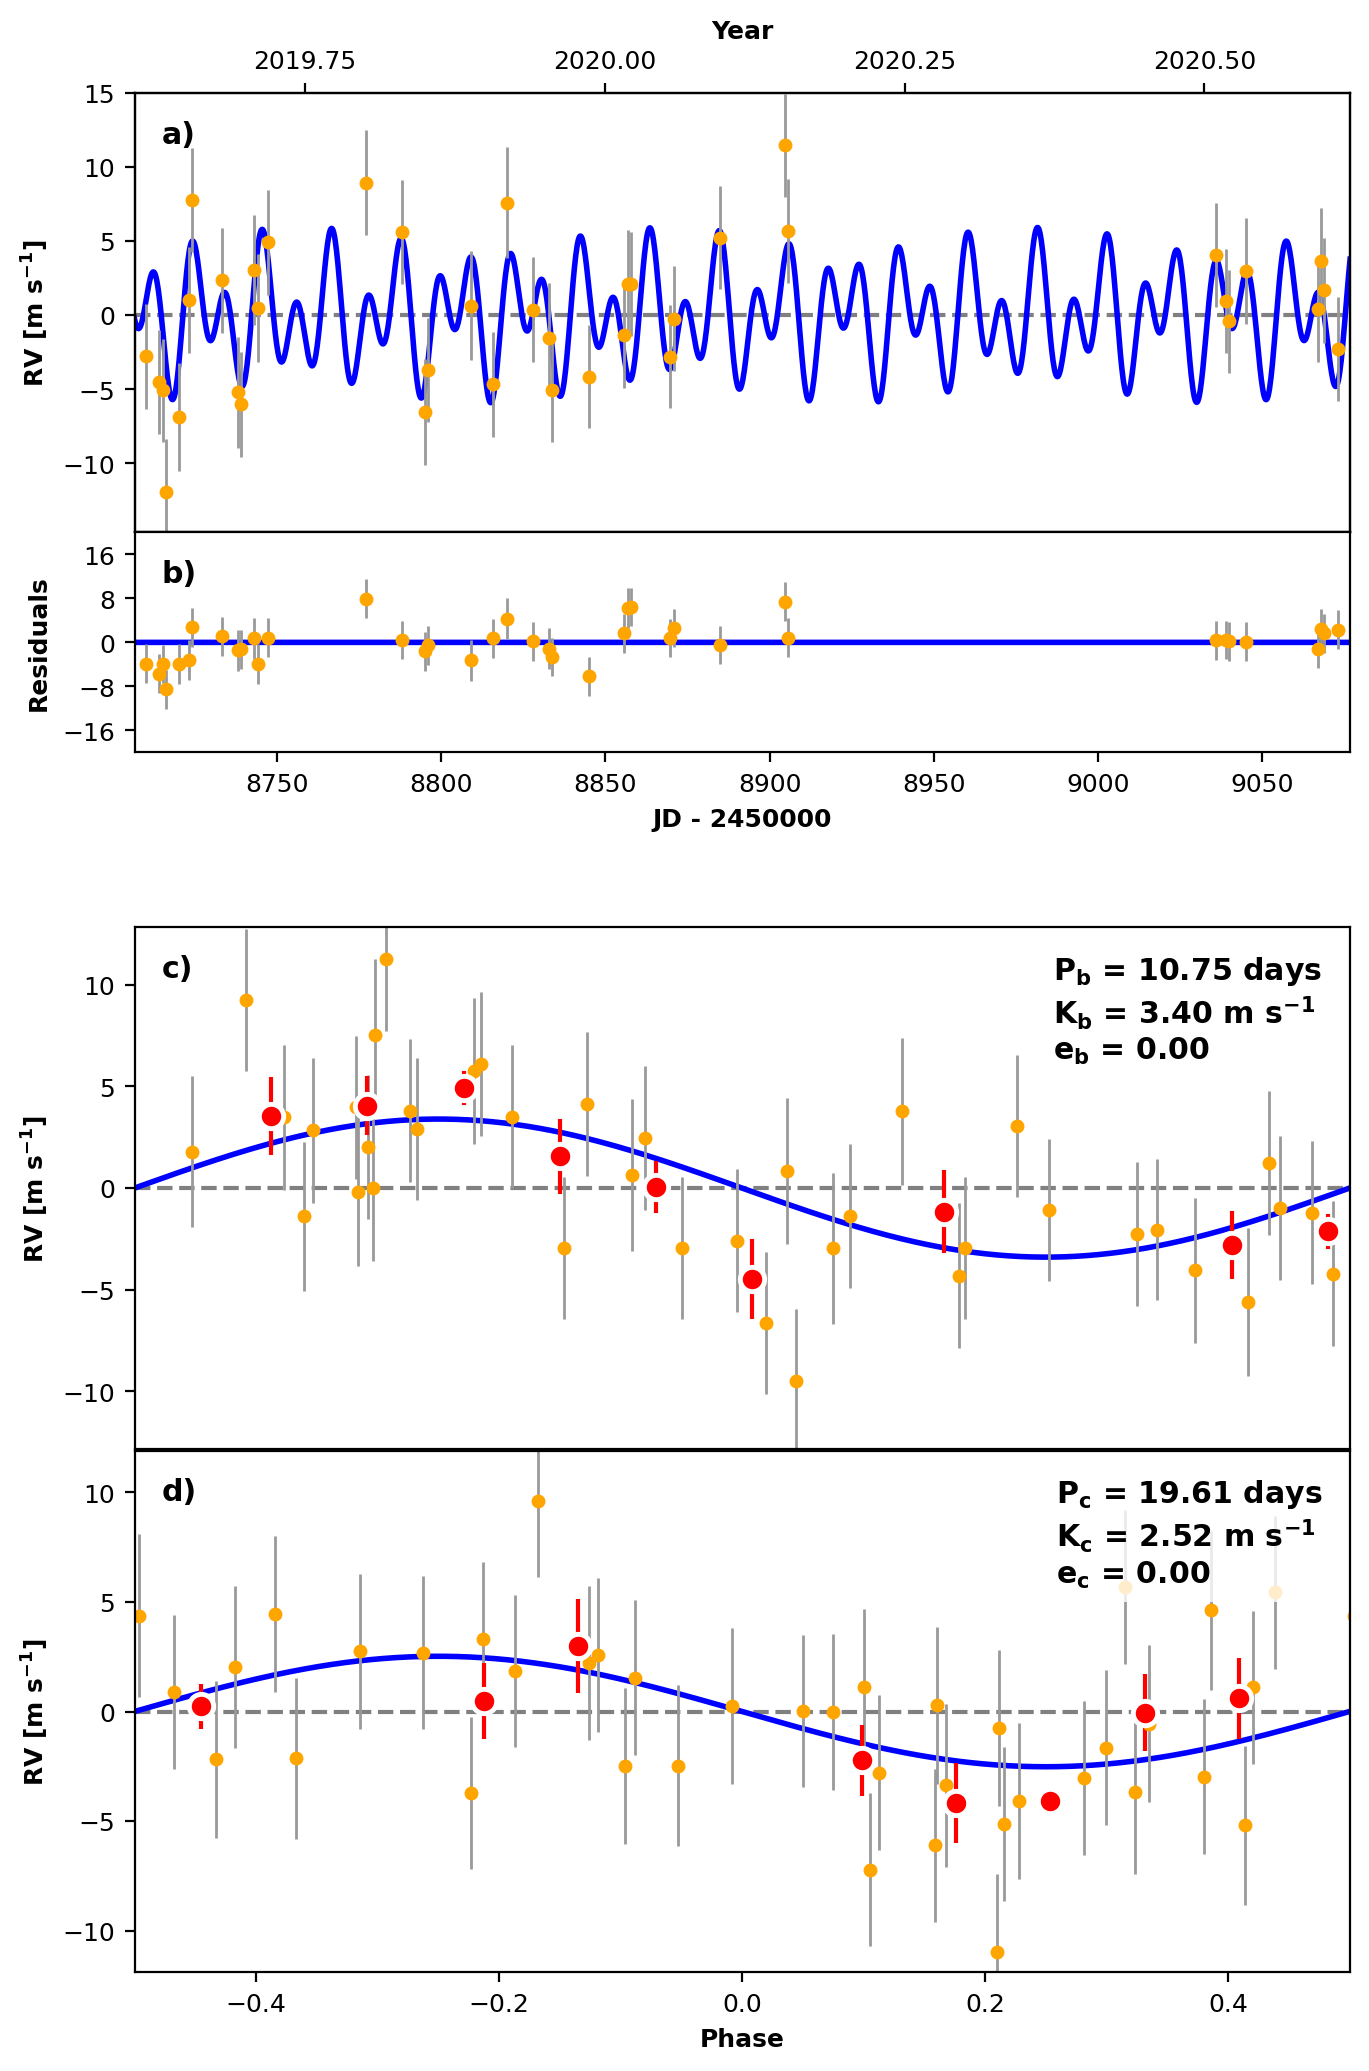

In [19]:
rvplot = orbit_plots.MultipanelPlot(sim_grid.post_grid[moc_ind, nrv_ind], legend=False)
fig, ax = rvplot.plot_multipanel()
# fig.savefig('multipanel_foo.png', bbox_inches='tight', dpi=600, facecolor='white')

## If using a RadVel model that includes a GP

In [ ]:
rvplot = orbit_plots.GPMultipanelPlot(sim_grid.post_grid[moc_ind, nrv_ind], legend=False)
rvplot.plot_multipanel()
# fig.savefig('multipanel_GP_foo.png', bbox_inches='tight', dpi=600, facecolor='white')